325
343
50


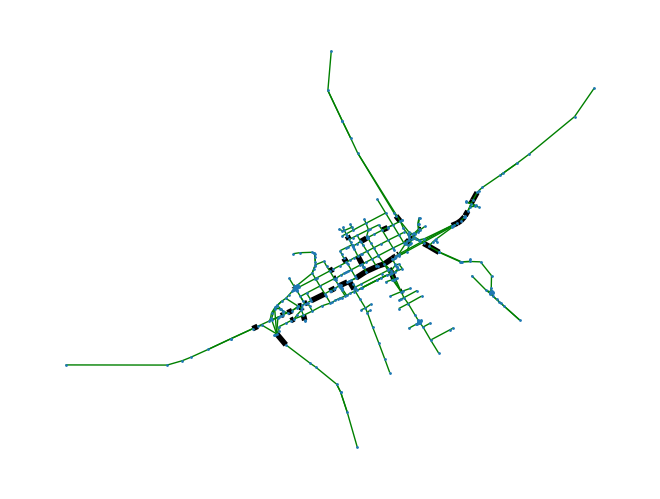

In [1]:
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys
import import_ipynb
from sklearn.model_selection import train_test_split

%run ./Data_handling.ipynb
%run ./Data_visualization.ipynb
%run ./Model.ipynb
%run ./Analysis.ipynb

## Data handling

In [2]:
G1 = read_sumo_net1('../Data/s_gyor.net.xml') # type: ignore
#G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"0.00")
#pyg_data = nx_to_pyg(G2)

In [107]:
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
data = torch.load('../Data/data.pth')
edges_to_hide = choose_hidden_edges_well(data, '../Data/s_gyor.net.xml', 3, 7, 0.3, 150)
#edges_to_hide = list(random.sample(range(504), int(504*0.9)))
print(len(edges_to_hide))

404


## Initialization of the model

In [159]:
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
#with open('../Data/edges_to_hide.json', 'r') as file:
#    edges_to_hide = json.load(file)
data = torch.load('../Data/data.pth')

#data_train , data_test = train_test_split(data, test_size=0.3 , shuffle=True)

data_train = torch.load('../Data/data_train.pth')
data_test = torch.load('../Data/data_test.pth')

prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, summa = data_preparation(data_train, data_test, edges_to_hide, True)
print(summa)


# Define the model
edge_dim = 1  # Number of edge features
hidden_dim1 = 32
hidden_dim2 = 128
hidden_dim3 = 64
hidden_dim4 = 32
hidden_dim5 = 32
hidden_dim6 = 32
hidden_dim7 = 32
hidden_dim8 = 32

model = GNN(edge_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, hidden_dim6, hidden_dim7, hidden_dim8)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

losses, total_train_losses, total_test_losses ,test_losses,total_geh_losses= training_the_model(model, optimizer, criterion, 1000, prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, edges_to_hide, 20)

#with open('total_losses.json', 'w') as file:
#    json.dump(total_losses, file)
#with open('losses.json', 'w') as file:
#    json.dump(losses, file)

tensor(9.1748e-07)
Epoch 1, Loss: 0.16699838638305664 , Test loss: 0.15696902573108673 
Epoch 21, Loss: 0.003094051731750369 , Test loss: 0.0022473924327641726 
Epoch 41, Loss: 0.0019497842295095325 , Test loss: 0.0020697060972452164 
Epoch 61, Loss: 0.0013518818886950612 , Test loss: 0.0013138586655259132 
Epoch 81, Loss: 0.001092735561542213 , Test loss: 0.0010864355135709047 
Epoch 101, Loss: 0.0009401401039212942 , Test loss: 0.0009329357999376953 
Epoch 121, Loss: 0.000807052303571254 , Test loss: 0.0008011834579519928 
Epoch 141, Loss: 0.0006930805975571275 , Test loss: 0.0006879430147819221 
Epoch 161, Loss: 0.0005917121889069676 , Test loss: 0.0005870533059351146 
Epoch 181, Loss: 0.0005026704748161137 , Test loss: 0.0004985467530786991 
Epoch 201, Loss: 0.0004254467785358429 , Test loss: 0.00042184386984445155 
Epoch 221, Loss: 0.00035951737663708627 , Test loss: 0.00035652617225423455 
Epoch 241, Loss: 0.00030367079307325184 , Test loss: 0.0003012626839336008 
Epoch 261, Loss

In [72]:
total_geh_losses

[nan, nan, nan, nan, nan]

In [5]:
torch.save(model.state_dict(), 'gnn_model_ces.pth')
#cep : change every step
layers = [model.conv1, model.conv2, model.conv3, model.conv4, model.conv5, model.conv6, model.conv7, model.conv8]
edge_dims = []
for layer in layers:
    edge_dims.append(layer.in_channels)
edge_dims.append(model.linear.in_features)
with open('dimensions.json','w') as file:
    json.dump(edge_dims, file)


## Loading the model
Once we trained it nd saved it, this is how we can load it

In [6]:
with open('edges_to_hide.json', 'r') as file:
    edges_to_hide = json.load(file)
data = torch.load('data.pth')

prepared_training_data, prepared_test_data, summa = data_preparation(data, edges_to_hide)

with open('dimensions.json', 'r') as file:
    edge_dims = json.load(file)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('gnn_model_ces.pth'))
output = model2(prepared_training_data[3].edge_attr, prepared_training_data[3].edge_index)



FileNotFoundError: [Errno 2] No such file or directory: 'edges_to_hide.json'

## Data visualization

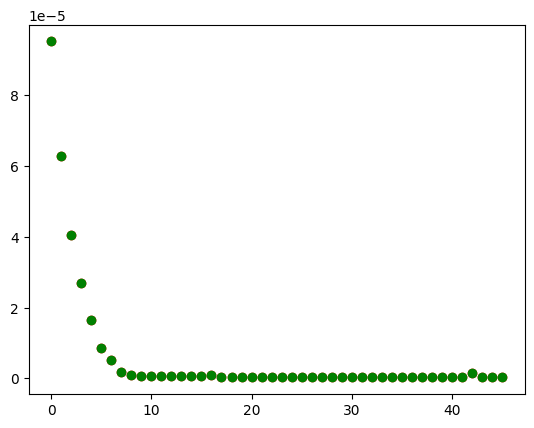

In [133]:
plt.plot(total_train_losses, 'ro', total_test_losses[4:], 'go')
plt.show()

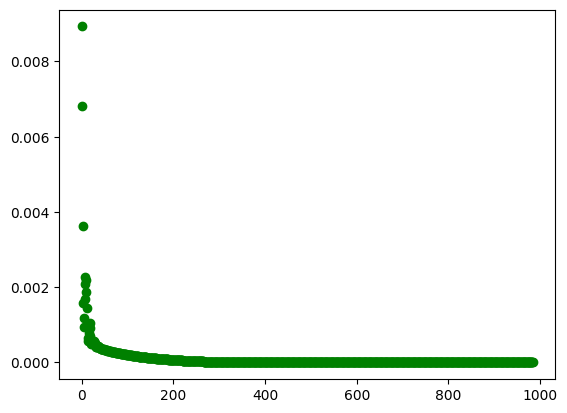

In [149]:
#plt.yscale("log")
plt.plot(losses[15:], 'go')
plt.show()

In [160]:
losses_30_smart = [ losses, total_train_losses, total_test_losses ,test_losses,total_geh_losses]
with open('losses_20_smart_mod9.json', 'w') as file:
    json.dump(losses_30_smart, file)

In [161]:
torch.save(model.state_dict(), 'gnn_model_ces_20_smart_mod9.pth')

In [162]:
with open('edges_to_hide_20_smart_mod9.json', 'w') as file:
    json.dump(edges_to_hide, file)

In [163]:
mod = [8, 16, 32, 16, 8, 8, 4, 4]
with open('mod_9.json', 'w') as file:
    json.dump(mod, file)

In [164]:
len(data_train)

950

In [5]:
with open('../gnn_outputs/edges_to_hide_30_smart.json', 'r') as file:
    edges_to_hide = json.load(file)

In [6]:
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
#with open('../Data/edges_to_hide.json', 'r') as file:
#    edges_to_hide = json.load(file)
data = torch.load('../Data/data.pth')

#data_train , data_test = train_test_split(data, test_size=0.3 , shuffle=True)

data_train = torch.load('../Data/data_train.pth')
data_test = torch.load('../Data/data_test.pth')

prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, summa = data_preparation(data_train, data_test, edges_to_hide, True)
print(summa)

tensor(9.1748e-07)


In [7]:

with open('dimensions.json', 'r') as file:
    edge_dims = json.load(file)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../gnn_outputs/gnn_model_ces_30_smart.pth'))
output = model2(prepared_training_data[3].edge_attr, prepared_training_data[3].edge_index)


In [8]:

plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[3] )

352
[2, 3, 4, 6, 10, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 32, 33, 34, 37, 38, 39, 42, 43, 45, 47, 49, 51, 54, 55, 56, 57, 59, 60, 61, 62, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 81, 82, 84, 85, 86, 88, 89, 90, 92, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 138, 140, 141, 142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 162, 164, 165, 167, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 184, 187, 188, 189, 190, 191, 193, 195, 196, 198, 201, 202, 203, 204, 206, 207, 210, 211, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 254, 256, 259, 260, 261, 262, 263, 266, 268, 270, 271, 272, 274, 275, 276, 277, 278, 279, 281, 283, 285, 286, 288, 289, 290, 292, 293, 295

IndexError: list index out of range

<Figure size 1600x900 with 0 Axes>